## Exploratory data analysis, variables:

X2: Gender (1 = male; 2 = female).

X3: Education Levels (1 = graduate school; 2 = university; 3 = high school; 4 = others).

In [1]:
# define two functions for quick plotting
import matplotlib.pyplot as plt

def pie1(data, label, title):
    '''A function to create a pie chart'''
    plt.figure(figsize=(3,3))
    plt.pie(data, labels = label, autopct = '%.2f%%')
    plt.title(title, fontsize=10)
    plt.show()
    
def pie2(data1, label1, title1, data2, label2, title2):
    '''A function to create two pie charts in a row'''
    plt.figure(figsize=(3,3))
    fig, axs = plt.subplots(1,2)
    axs[0].pie(data1, labels = label1, autopct = '%.2f%%')
    axs[0].set_title(title1)
    axs[1].pie(data2, labels = label2, autopct = '%.2f%%')
    axs[1].set_title(title2)
    plt.tight_layout()

In [2]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.getOrCreate()

# reading in the data
infile = 'default.csv'
df = spark.read.csv(infile, inferSchema=True, header = True)

In [3]:
# Create subsets

########## Not Default ##########
default_no = df.filter(df['default payment next month'] == 0)

# by gender
default_no_male = default_no.filter(default_no['SEX'] == 1)
default_no_female = default_no.filter(default_no['SEX'] == 2)

# by education level
default_no_grad = default_no.filter(default_no['EDUCATION'] == 1)
default_no_uni = default_no.filter(default_no['EDUCATION'] == 2)
default_no_high = default_no.filter(default_no['EDUCATION'] == 3)
default_no_other = default_no.filter(default_no['EDUCATION'] == 4)

########## Default ##########
default_yes = df.filter(df['default payment next month'] == 1)

# by gender
default_yes_male = default_yes.filter(default_yes['SEX'] == 1)
default_yes_female = default_yes.filter(default_yes['SEX'] == 2)

# by education level
default_yes_grad = default_yes.filter(default_yes['EDUCATION'] == 1)
default_yes_uni = default_yes.filter(default_yes['EDUCATION'] == 2)
default_yes_high = default_yes.filter(default_yes['EDUCATION'] == 3)
default_yes_other = default_yes.filter(default_yes['EDUCATION'] == 4)

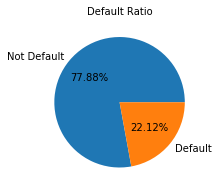

In [4]:
# distribution of default/no default, for all clients
default = [default_no.count(),default_yes.count()]
default_label = ["Not Default","Default"]
pie1(default, default_label, "Default Ratio")

## Client Gender Distribution

<Figure size 216x216 with 0 Axes>

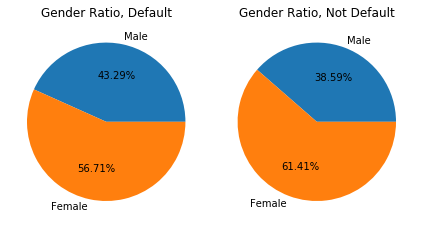

In [5]:
# people who default next month, by gender
default_yes_gender = [default_yes_male.count(), default_yes_female.count()]
gender_label = ["Male","Female"]

# people who don't default next month, by gender
default_no_gender = [default_no_male.count(), default_no_female.count()]
gender_label = ["Male","Female"]

# pie charts
pie2(default_yes_gender, gender_label, "Gender Ratio, Default",
     default_no_gender, gender_label, "Gender Ratio, Not Default")

## Male and Female Default Ratios

<Figure size 216x216 with 0 Axes>

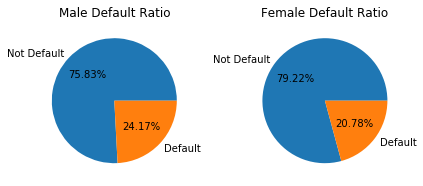

In [6]:
# male default ratio
male_default = [default_no_male.count(), default_yes_male.count()]
default_label = ["Not Default","Default"]

# female default rate
female_default = [default_no_female.count(), default_yes_female.count()]
default_label = ["Not Default","Default"]

# pie charts
pie2(male_default, default_label, "Male Default Ratio",
    female_default, default_label, "Female Default Ratio")

## Client Education Levels

<Figure size 216x216 with 0 Axes>

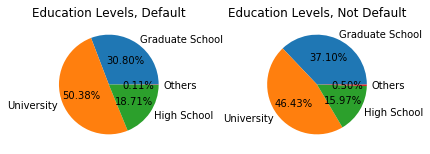

In [7]:
# people who default next month, by education level
default_yes_education = [default_yes_grad.count(), default_yes_uni.count(),
                        default_yes_high.count(), default_yes_other.count()]
education_label = ["Graduate School", "University","High School","Others"]

# people who don't default next month, by education level
default_no_education = [default_no_grad.count(), default_no_uni.count(),
                        default_no_high.count(), default_no_other.count()]
education_label = ["Graduate School", "University","High School","Others"]

# pie charts
pie2(default_yes_education, education_label, "Education Levels, Default",
    default_no_education, education_label, "Education Levels, Not Default")

## Education Levels and Type of Default

<Figure size 432x432 with 0 Axes>

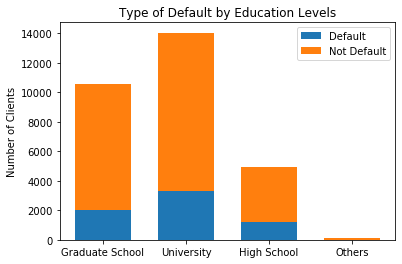

In [8]:
# type of default, by education levels
education_label = ["Graduate School", "University","High School","Others"]
width = 0.666

plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.bar(education_label, default_yes_education, width, label='Default')
ax.bar(education_label, default_no_education, width, label='Not Default', bottom=default_yes_education)
ax.set_ylabel('Number of Clients')
ax.set_title('Type of Default by Education Levels')
ax.legend()
plt.show()